<a href="https://colab.research.google.com/github/tutalae/TensorFlow/blob/main/easy_Deep_Learning_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow import keras

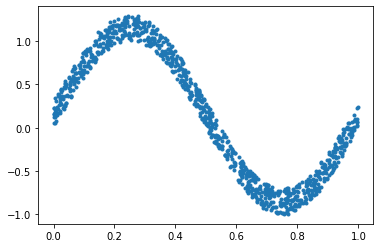

In [2]:
n = 1000
X = np.random.rand(n)
Y = np.sin(2*np.pi*X) + np.random.rand(n) * 0.3
plt.plot(X,Y,'.');

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(f'#traning = {X_train.shape[0]}')
print(f'#validation = {X_val.shape[0]}')
print(f'#test = {X_test.shape[0]}')

#traning = 640
#validation = 160
#test = 200


In [4]:
# sequential model
def get_SequentialModel(learning_rate = 0.01):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(100,activation='relu',input_shape=(1,)))
    model.add(keras.layers.Dense(100,activation='relu'))
    model.add(keras.layers.Dense(1))
    model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=learning_rate))
    return model

In [13]:
# or
bar = keras.models.Sequential([keras.layers.Dense(100,activation='relu',input_shape=(1,))
                                     ,keras.layers.Dense(100,activation='relu')
                                     ,keras.layers.Dense(1)])
bar.compile(loss='mse',optimizer=keras.optimizers.SGD())

In [10]:
# functional model
def get_FunctionalModel(learning_rate = 0.01):
    input_ = keras.layers.Input((1,))
    x = keras.layers.Dense(100,activation='relu')(input_)
    x = keras.layers.Dense(100,activation='relu')(x)
    output = (keras.layers.Dense(1))(x)
    model = keras.Model(inputs=input_,outputs=output)
    model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=learning_rate))
    return model

In [11]:
# sub-class model
class Get_SubclassModel(keras.Model):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        self.h1 = keras.layers.Dense(100,activation = 'relu')
        self.h2 = keras.layers.Dense(100,activation = 'relu')
        self.output_ = keras.layers.Dense(1)
    def call(self,inputs):
        h1 = self.h1(inputs)
        h2 = self.h2(h1)
        output_ = self.output_(h2)
        return output_

In [12]:
model = Get_SubclassModel()
model.compile(loss='mse',optimizer='SGD')

In [14]:
# train model
model = get_SequentialModel()
# model = get_FunctionalModel()
# model = Get_SubclassModel()
# model.compile(loss='mse',optimizer='SGD') #กรณี sub-class
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_val,y_val))

Epoch 1/500
20/20 [==============================] - 1s 23ms/step - loss: 0.5043 - val_loss: 0.4298
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 0.4572 - val_loss: 0.3968
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4477 - val_loss: 0.3659
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3844 - val_loss: 0.3400
Epoch 5/500
20/20 [==============================] - 0s 3ms/step - loss: 0.3590 - val_loss: 0.3140
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.3412 - val_loss: 0.2906
Epoch 7/500
20/20 [==============================] - 0s 3ms/step - loss: 0.3086 - val_loss: 0.2679
Epoch 8/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2790 - val_loss: 0.2484
Epoch 9/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2800 - val_loss: 0.2335
Epoch 10/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2581 - val_loss: 0.2169
Epoch 11

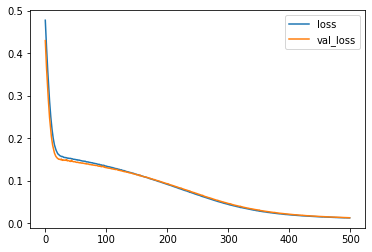

In [15]:
pd.DataFrame(history.history).plot();

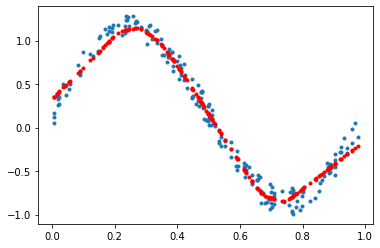

In [16]:
Z = model.predict(X_test)
plt.plot(X_test,y_test,'.')
plt.plot(X_test,Z,'.r')

In [17]:
#Save Model
model.save('medium.h5')

In [18]:
#Load Model
model_2 = keras.models.load_model('medium.h5')

In [19]:
model_2.summary() # ดูสรุป model
model_2.get_weights() # คือค่า array ทีเก็บ weight เอาไว้

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


[array([[-0.19593096, -0.14878255, -0.19334185,  0.28602326, -0.06101899,
         -0.10665362, -0.00513203, -0.05500379,  0.24398006, -0.06579208,
          0.00245138,  0.7358108 ,  0.24868307, -0.22762755, -0.22042967,
          0.3004909 ,  0.49597338,  0.06875768,  0.7356571 , -0.13144249,
         -0.06405294,  0.24497026, -0.10334776, -0.23834144, -0.16678888,
         -0.05742893,  0.16777602,  0.05675442,  0.22775692, -0.05290549,
         -0.13130407, -0.15642409, -0.11281653, -0.00953013,  0.20060275,
         -0.15965894, -0.20924711,  0.05497863, -0.33643046,  0.5482846 ,
          0.16208349,  0.08082452,  0.5213382 , -0.04646236,  0.29016995,
         -0.45399407,  0.3674027 , -0.12927032,  0.29294622,  0.39926904,
         -0.23931177,  0.19765094,  0.12597363, -0.04659723, -0.01011251,
          0.28654233,  0.26482207,  0.17100771, -0.06199792, -0.09890127,
         -0.14009851,  0.50193065,  0.28943452, -0.01774627,  0.3916299 ,
          0.35695705, -0.1689708 , -0.

In [20]:
early_stop = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('middle_weight.h5')

In [21]:
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_val,y_val),callbacks=[early_stop,check_point])

Epoch 1/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0124 - val_loss: 0.0129
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0131
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0125 - val_loss: 0.0128
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0128
Epoch 5/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 0.0129
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0127
Epoch 7/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0122 - val_loss: 0.0126
Epoch 8/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.0126
Epoch 9/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.0126
Epoch 10/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.0126
Epoch 11/

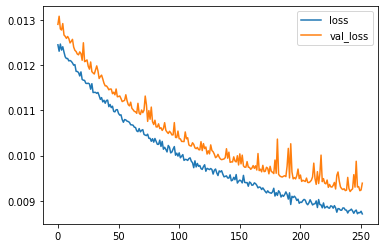

In [22]:
pd.DataFrame(history.history).plot();

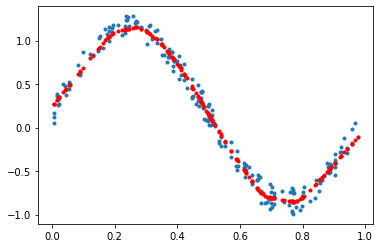

In [23]:
Z_1 = model.predict(X_test)
plt.plot(X_test,y_test,'.')
plt.plot(X_test,Z_1,'.r')